# Electron Cross Section

> Lennon+ 1988

For each species investigated, the recommended cross section has been fitted by the following equation

$$
\sigma ( E ) = \frac { 1 } { I E } \left[ A \ln \left( \frac { E } { I } \right) + \sum _ { i = 1 } ^ { N } B _ { i } \left( 1 - \frac { I } { E } \right)^i \right]
$$

where $E$ is the incident electron energy, $I$ is the ionization potential, and the coefficients $B_i$ are determined by a least-squares fitting procedure

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigma(E, I, A, *B):
    i = 1
    sig = A*np.log(E/I)/I/E
    for Bi in B:
        sig += Bi/I/E*(1-I/E)**i
        i += 1
    return(sig*1e-13)

def coefficient(E, I, A, *B):
    return(sigma(E, I, A, *B)*np.sqrt(E*1.6021773e-12*2/9.10938356e-28))

# Fluorine

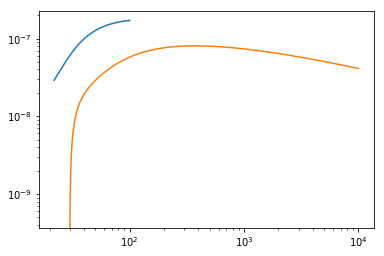

In [3]:
Fx = np.logspace(np.log10(17.4)+0.1, 2, 500)
Fy = coefficient(Fx, 17.4, 2.790, 0.469, -12.900, 26.260, -13.430)
plt.loglog(Fx, Fy)
Fx = np.logspace(np.log10(17.4)+0.1, 4, 500)
Fz = coefficient(Fx, 30.0 , 3.925 ,-0.947 ,-5.688 , 4.911 , -0.083, -0.160)
plt.loglog(Fx, Fz)
plt.show()

# Neon

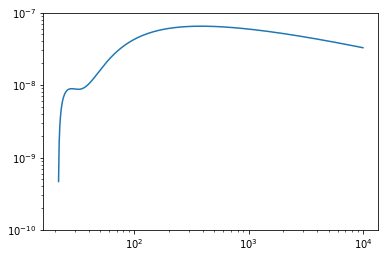

In [4]:
Fx = np.logspace(np.log10(21.7), 4, 500)
Fy = coefficient(Fx, 21.6 , 2.192 , -0.447, -7.006, 5.927)
plt.loglog(Fx, Fy)
plt.ylim(1e-10,1e-7)
plt.show()

Here we consider the ratio of each cross section at 50 eV, which is a typical energy of a secondary electron (the dependence of this ratio on energy is small according to Maloney+ 1996). 

In [11]:
H = sigma(50, 13.6, 0.185, -0.019, 0.123, -0.190, 0.953)
HE = sigma(50, 24.6, 0.572,- 0.344, - 0.523, 3.445, - 6.821,  5.578)
C = sigma(50, 11.3, 2.114, -1.965, -0.608)
N = sigma(50, 14.5, 2.265, -1.710, -2.322, 1.732)
O = sigma(50, 13.6, 2.455, -2.181, -1.570)
F = sigma(50, 17.4, 2.790, 0.469, -12.900, 26.260, -13.430)
MG = sigma(50, 7.60, 0.484, 1.750, - 1.562, 3.787)
FE = sigma(50, 7.9, 1.142, -0.92, 1.782, -1.694)
NA = sigma(50, 5.1, 0.796, -0.770, 2.323, -3.929, 1.562)
SI = sigma(50, 8.2, 1.573, 0.722, -2.687, 1.856)
P = sigma(50, 10.5, 1.704, 1.518, -2.982, 1.774)
S = sigma(50, 10.4, 3.150, -2.350, -2.032)
CL = sigma(50, 20.0, 6.102, 2.195, -15.616, 10.310, -0.588)
print('He/H=', HE/H)
print('C/H=', C/H)
print('N/H=', N/H)
print('O/H=', O/H)
print('F/H=', F/H)
print('Mg/H=', MG/H)
print('Fe/H=', FE/H)
print('Na/H=', NA/H)
print('Si/H=', SI/H)
print('P/H=', P/H)
print('S/H=', S/H)
print('Cl/H=', CL/H)

He/H= 0.3204728571969797
C/H= 3.11361486414008
N/H= 2.0028570095656733
O/H= 1.5956962140327202
F/H= 4.205895677811162
Mg/H= 13.172565985638398
Fe/H= 5.606452630363866
Na/H= 6.40905424645587
Si/H= 9.045711843382838
P/H= 7.645255352429739
S/H= 4.865322856655347
Cl/H= 4.803406385704663


In [156]:
def tot_cross_section(names, *species):
    cross = 0
    #print(names)
    for spe in species:
        while spe in names:
            import copy
            spe_name = copy.deepcopy(spe) 
            if names.index(spe_name)+len(spe_name) < len(names):
                factor = names[names.index(spe_name)+len(spe_name)]
                if factor.isdigit():
                    factor = eval(factor)
                    cross += factor * eval(spe_name)/H
                    spe_name += str(factor)
                else:
                    cross += eval(spe_name)/H
            else:
                cross += eval(spe_name)/H
            names = names[:names.index(spe_name)]+names[names.index(spe_name)+len(spe_name):]
    return(cross)

In [159]:
num = 'k(4452)' #The code of X-ray ionization H -> H+ + E
with open('./CR_ionization.txt') as f:
    cross = 0
    for line in f:
        l = line.strip()
        if len(l) == 0:
            continue
        if l[0] == '!':
            print(l)
            names = l[l.index('!')+1:l.index(' ->')]
            cross = tot_cross_section(names, 'NA', 'MG', 'SI', 'P', 'S', 'CL', 'FE', 'N', 'O', 'F', 'C', 'H')
            #print(cross)
        if l[0] == 'k':
            nrea = l[0: l.index('=')-1]
            print(nrea, '=', nrea, '+', str(cross), '*', num)
            print()

!C -> C+ + E
k(14) = k(14) + 3.11361486414008 * k(4452)

!CL -> CL+ + E
k(15) = k(15) + 4.803406385704663 * k(4452)

!FE -> FE+ + E
k(16) = k(16) + 5.606452630363866 * k(4452)

!H -> H+ + E
k(17) = k(17) + 1.0 * k(4452)

!MG -> MG+ + E
k(19) = k(19) + 13.172565985638398 * k(4452)

!N -> N+ + E
k(20) = k(20) + 2.0028570095656733 * k(4452)

!NA -> NA+ + E
k(21) = k(21) + 6.40905424645587 * k(4452)

!O -> O+ + E
k(22) = k(22) + 1.5956962140327202 * k(4452)

!P -> P+ + E
k(23) = k(23) + 7.645255352429739 * k(4452)

!S -> S+ + E
k(24) = k(24) + 4.865322856655347 * k(4452)

!SI -> SI+ + E
k(25) = k(25) + 9.045711843382838 * k(4452)

!C2 -> C + C
k(26) = k(26) + 6.22722972828016 * k(4452)

!CCL -> C + CL
k(27) = k(27) + 7.917021249844742 * k(4452)

!CH -> C + H
k(28) = k(28) + 4.1136148641400805 * k(4452)

!CLO -> CL + O
k(29) = k(29) + 6.3991025997373825 * k(4452)

!CN -> C + N
k(30) = k(30) + 5.116471873705754 * k(4452)

!CO -> C + O
k(31) = k(31) + 4.7093110781728 * k(4452)

!CO -> CO+ + E